<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Hitung_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meng-__Aproksimasi__ Nilai $\pi$

Dulu waktu di sekolah, kita diberi tahu bahwa $\pi = \frac{22}{7}$.

Faktanya, $\pi$ adalah bilangan irasional (tidak bisa dituliskan sebagai rasio dari dua bilangan).

Lantas berapa nilai $\pi$ yang sesungguhnya?

Ada banyak cara untuk menghitungnya, salah satunya dengan cara pendekatan simulasi.

---

### Yuk kita hitung nilai $\pi$ bersama!

# Langkah I


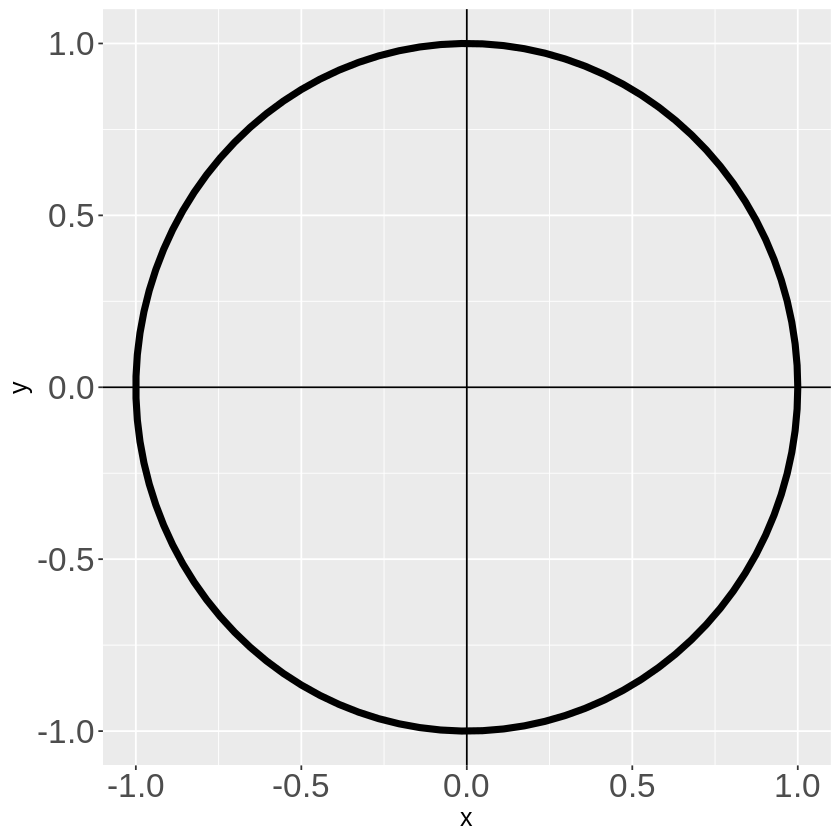

In [6]:
#@title Buat gambar lingkaran berjari-jari 1 sebagai berikut:
# mulai dari hati yang bersih
rm(list = ls())

# panggil libraries
library(dplyr)
library(ggplot2)

# gambar lingkaran
xc = 0
yc = 0
r = 1
ggplot() + annotate("path",
   x=xc+r*cos(seq(0,2*pi,length.out=100)),
   y=yc+r*sin(seq(0,2*pi,length.out=100)),
   size = 2) +
   geom_vline(xintercept = 0) +
   geom_hline(yintercept = 0) +
   theme(axis.text = element_text(size = 20),
         axis.title = element_text(size = 15))

# Langkah II

Warning message:
“Removed 750 row(s) containing missing values (geom_path).”


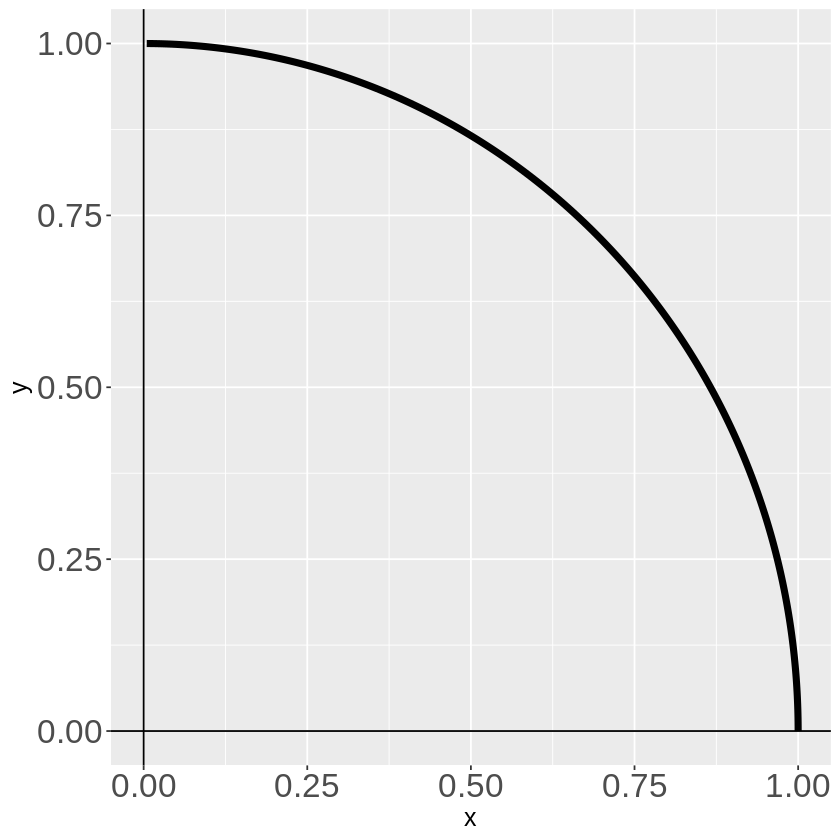

In [7]:
#@title Perhatikan perempat lingkaran berikut ini:

# gambar lingkaran
xc = 0
yc = 0
r = 1
ggplot() + annotate("path",
   x=xc+r*cos(seq(0,2*pi,length.out=1000)),
   y=yc+r*sin(seq(0,2*pi,length.out=1000)),
   size = 2) +
   geom_vline(xintercept = 0) +
   geom_hline(yintercept = 0) +
   theme(axis.text = element_text(size = 20),
         axis.title = element_text(size = 15)) +
   xlim(0,1) +
   ylim(0,1)

## Lingkaran di atas akan saya sebut $L_1$

### Luas $L_1$ dihitung dengan cara: $\frac{1}{4} . \pi.r^2 = \frac{\pi}{4}$

### Jadi kalau kita bisa menemukan cara __numerik__ untuk menghitung luas $L_1$, maka kita akan bisa meng-aproksimasi nilai dari $\pi$.

# Langkah III
## Luas $L_1$ akan saya hitung dengan cara sebagai berikut:

### Saya akan _generate_ random dots pada area grafik perempat lingkaran di atas. Saat titiknya berada di dalam lingkaran, maka saya akan berikan warna biru. Sedangkan saat titiknya berada di luar lingkaran, maka akan saya beri warna merah. 

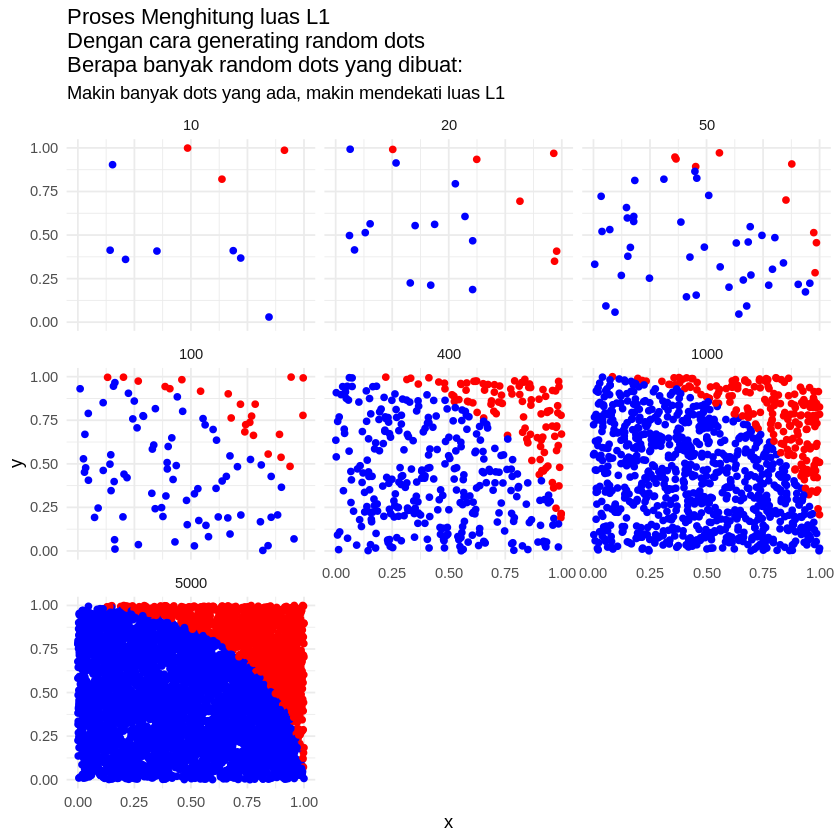

In [8]:
#@title
# bikin fungsi utk generate data
  # lalu kita rbind
generate_sim = function(n){
  data = data.frame(
  x = runif(n),
  y = runif(n),
  iterasi = n
  ) %>%
  mutate(penanda = ifelse(x^2 + y^2 <= 1, "a", "b")) %>% distinct()
  return(data)
}

# sekarang kita bikin datasetnya
n_sim = c(10,20,50,100,400,1000,5000)

# kita mulai iterasinya
i = 1
data_sim = generate_sim(n_sim[i])

for(i in 2:length(n_sim)){
  temp = generate_sim(n_sim[i])
  data_sim = rbind(data_sim,temp)
}

# yuk kita bikin dulu titiknya
data_sim %>%
    ggplot(aes(x = x, y = y)) +
    geom_point(aes(color = penanda)) +
    facet_wrap(~iterasi) +
    scale_color_manual(values = c("blue","red")) +
    theme_minimal() +
    labs(x = "x",
         y = "y",
         title = "Proses Menghitung luas L1\nDengan cara generating random dots\nBerapa banyak random dots yang dibuat:",
         subtitle = "Makin banyak dots yang ada, makin mendekati luas L1") +
         theme(legend.position = "none")  

# Langkah IV
## Luas $L_1$ didapatkan dengan cara: $\frac{\sum \text{blue dots}}{\sum \text{all dots}}$

In [5]:
#@title
set.seed(10104074)
hitung_pi = function(n){
  x = runif(n)
  y = runif(n)
  data = data.frame(x,y)
  data =
    data %>%
    mutate(jatuh = x^2 + y^2,
           ket = ifelse(jatuh <= 1, 1,0))
  return(4 * sum(data$ket)/n)
}

# saatnya simulasi
simulasi = data.frame(
  n = c(10,20,50,75,100,400,600,999,1100,2000,
        3000,5000,7500,10000,20000,30000,500000,
        1000000,2000000,4000000,9000000),
  pi = 0
)

simulasi$pi = sapply(simulasi$n,hitung_pi)
simulasi$beda = pi - simulasi$pi
simulasi %>% 
  rename("Total Generated Dots" = n,
         "Aproksimasi nilai Pi" = pi,
         "Selisih dengan nilai Pi sebenarnya" = beda)

Total Generated Dots,Aproksimasi nilai Pi,Selisih dengan nilai Pi sebenarnya
<dbl>,<dbl>,<dbl>
10,4.000000,-0.8584073464
20,3.000000,0.1415926536
50,3.040000,0.1015926536
75,3.040000,0.1015926536
100,3.280000,-0.1384073464
400,3.230000,-0.0884073464
600,3.153333,-0.0117406797
999,3.143143,-0.0015504896
1100,3.167273,-0.0256800737


# Makin banyak dots yang di-_generate_, makin akurat aproksimasi nilai $\pi$-nya!